<a href="https://colab.research.google.com/github/jpescobarn/Modelado-y-Simulaci-n-/blob/master/Bifurcaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bifurcaciones 

## Juan Pablo Escobar Naranjo 

## Bifurcación tipo Tridente 

En teoría de la bifurcación , un campo dentro de las matemáticas , una bifurcación tridente es un tipo particular de local de bifurcación donde las transiciones del sistema de un punto fijo a tres puntos fijos. Bifurcación tridente, como bifurcaciones de Hopf tienen dos tipos - supercríticas y subcríticas.

En los sistemas dinámicos continuos descritos por ecuaciones diferenciales ordinarias, este tipo de bifurcaciones ocurren genéricamente en sistemas con simetría .

En el caso general: 

Una ecuación diferencial ordinaria, 

$$\dot{x}=f(x,r)$$ 

descrita por una función uniparamétrica $f(x,r)$ con $r \in R$, satisfaciendo: 

$$-f(x,r)=f(-x,r)$$ 

$$ \frac{\partial f}{\partial x} (0, r_0)=0, \quad \frac{\partial ^2 f}{\partial x^2} (0, r_0)=0, \quad \frac{\partial ^3 f}{\partial x^3} (0, r_0) \neq 0$$ 

$$ \frac{\partial f}{\partial r} (0, r_0)=0, \quad \frac{\partial^2 f}{\partial r \partial x} (0, r_0) \neq 0 $$

tiene una bifurcación de pitchfork en $(x,r)=(0, r_0)$. La forma de la bifurcación es dada por el signo de la tercera derivada. 

$$\frac { \partial ^{ 3 }f }{ \partial x^{ 3 } } =\begin{cases} <0\quad supercrítico \\ >0\quad subcrítico\quad  \end{cases}$$

Realizaremos  ejemplo de bifurcación tipo Pitchfork supercrítco, la ecuación a tratar es: 

$$\dot{x}=rx-x^3$$ 



In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time


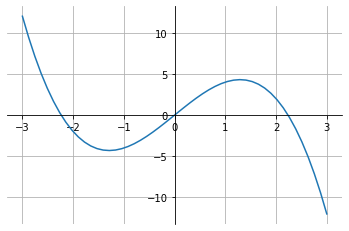

In [35]:
r = 5
x = np.linspace(-3,3)
dx = r*x-x**3

# Dibuja el gráfico auxiliar x vs.  xdot 

fig = plt.figure()
ax = fig.add_subplot(1,1,1)


ax.spines['left'].set_position(('data',0.0))
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')


plt.plot(x,dx)
plt.grid()
plt.show()


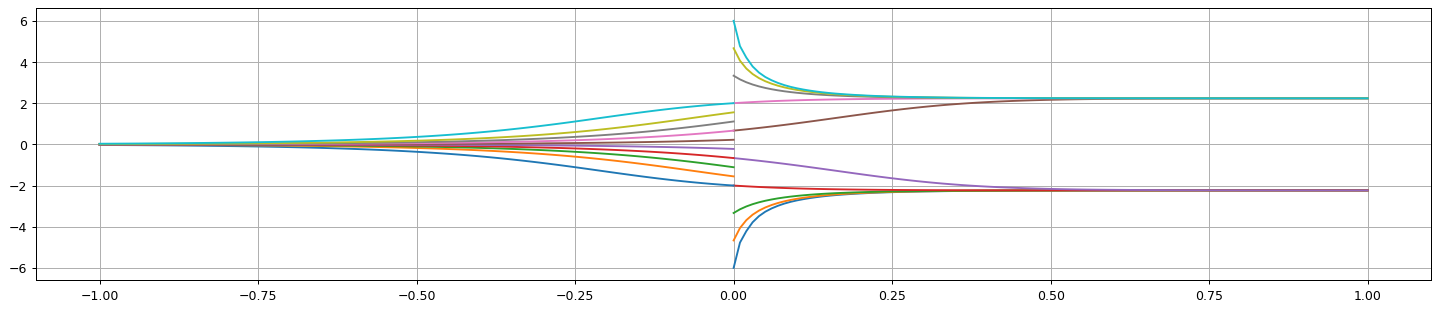

In [34]:
def dx(t, x, r ,b): return r*x-x**b

r,b = 5,3
x0 = np.linspace(-6,6,10)
tspan = [0, 1]
sol = solve_ivp(dx, tspan, x0,args=(r,b),\
                dense_output = True)

t = np.linspace(tspan[0],tspan[1],101)
x = sol.sol(t)
plt.figure(figsize=(20, 4), dpi=90)
for i in range(x0.size):
  plt.plot(t,x[i])

x0 = np.linspace(-2,2,10)
tspan = [0, -1]
sol = solve_ivp(dx, tspan, x0,args=(r,b),\
                dense_output = True)

t = np.linspace(tspan[0],tspan[1],101)
x = sol.sol(t)
for i in range(x0.size):
  plt.plot(t,x[i])
plt.grid()  
plt.show()


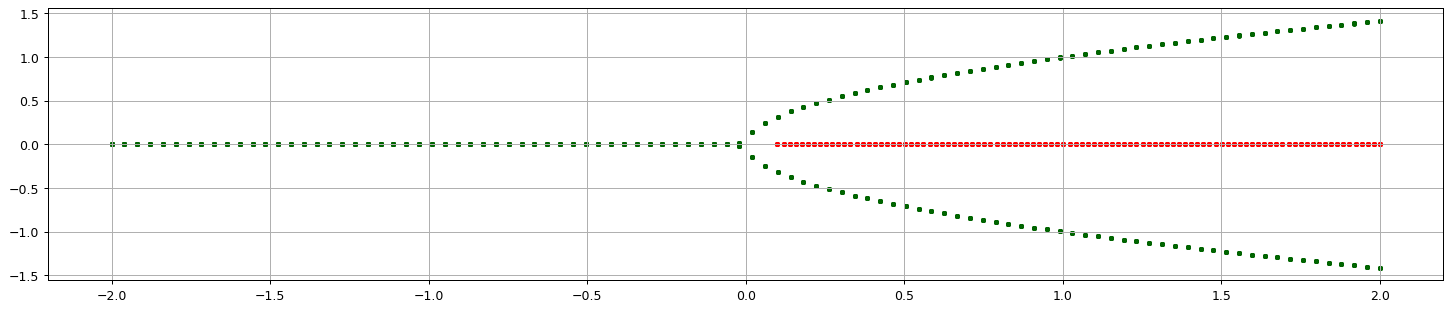

2.9963130950927734


In [33]:
def dx(t, x, r ,b): return r*x-x**b

r,b = 5,3
x0 = np.linspace(-6,6,10)
tspan = [0, 100]

r = np.linspace(-2,2,100)
tic = time.time()
plt.figure(figsize=(20, 4), dpi=90)
plt.grid()
for j in range(r.size):
    sol = solve_ivp(dx, tspan, x0,args=(r[j],b))

    t = sol.t
    x = sol.y
    for i in range(x0.size):
        plt.scatter(r[j],x[i,-1] , color='darkgreen', marker='.')

r,b = 4,3
x0 = np.linspace(-.1,.1,5)
tspan = [0, -100]

r = np.linspace(0.1,2,100)
tic = time.time()

for j in range(r.size):
    sol = solve_ivp(dx, tspan, x0,args=(r[j],b))

    t = sol.t
    x = sol.y
    for i in range(x0.size):
        plt.scatter(r[j],x[i,-1] , color='red', marker='.')
      


toc = time.time()
plt.show()
print(toc-tic)



##Bifurcación tipo silla-nodo

En matemática, una bifurcación silla-nodo (o tangente, o en inglés “saddle-node”, "tangent, o "fold") es una bifurcación local o global de una ecuación diferencial ordinaria en la que dos puntos fijos (o equilibrios, o críticos) de un sistema dinámico chocan y se aniquilan entre ellos mismo. La frase “bifurcación silla-nodo” se utiliza con frecuencia en referencia a sistemas dinámicos continuos. En los sistemas discretos, la misma bifurcación tiene el nombre (“bifurcación de fold”). Bifurcaciones silla-nodo son la forma genérica que el número de soluciones de equilibrio de un sistema dinámicos cambia cuando algún parámetro es variado. 

Si la ecuación diferencial ordinaria $\frac{\partial x}{\partial t} = f(x, c)$, descrita por un solo parámetro $c$ de la función $f(x, c)$, con $c$ siendo un miembro o elemento de los números reales $(C \in R)$, y $f(x, c)$ es una función a lo cual:

$$f(0, c_0)=0$$ 

además, 

$$ \frac{\partial f}{\partial x} (0,c_0) \quad \frac{\partial^2 f}{\partial x^2} > 0, \quad \frac{\partial f}{\partial c}(0, c_0) >0$$ 

Entonces existe un intervalo entre $(c_1, 0)$ y $(0, c_2)$ con $e>0$ donde:

1. Si $c \in (c_1,0)$, entonces $f_c(x)$ tiene dos puntos fijos  en $(e, -e)$ con el positivo siendo **no estable** y el negativo **estable**.
2. Si $c \in (0,c_2)$, entonces $f_c(x)$ tiene dos puntos fijos  en $(e, -e)$



Realizaremos un ejemplo de la bifurcación Saddle-Node, la ecuación a tratar es: 

$$\dot{x}=1+rx+x^2$$ 

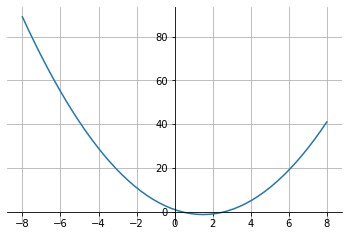

In [38]:
r = -3
x = np.linspace(-8,8)
dx = 1+r*x+x**2

# Dibuja el gráfico auxiliar x vs. xdot

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.spines['left'].set_position(('data',0.0))
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.plot(x,dx)
plt.grid()
plt.show()

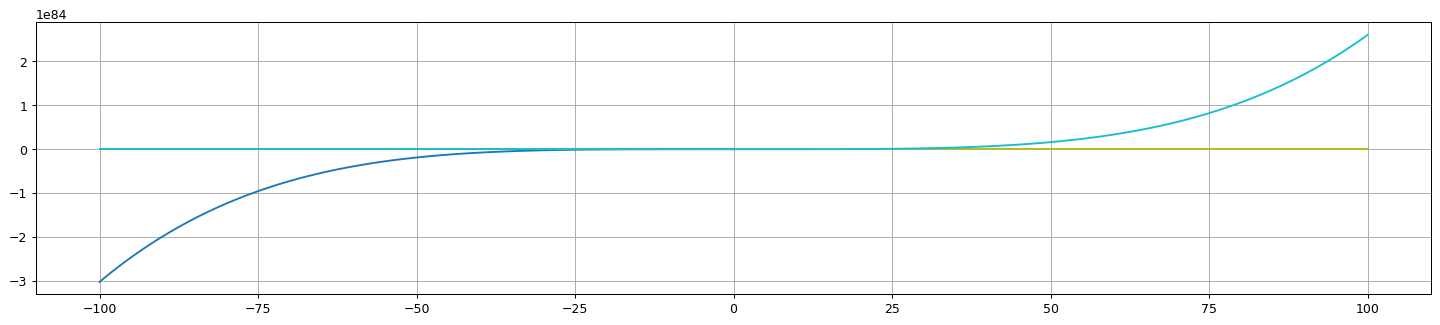

In [40]:
def dx2(t, x, r ,b): return 1+r*x+x**b

r,b = -4,2
x0 = np.linspace(-8,8,10)
tspan = [0, 100]
sol = solve_ivp(dx2, tspan, x0,args=(r,b),\
                dense_output = True)

t = np.linspace(tspan[0],tspan[1],101)
x = sol.sol(t)
plt.figure(figsize=(20, 4), dpi=90)
for i in range(x0.size):

  plt.plot(t,x[i])


x0 = np.linspace(-10,10,10)
tspan = [0, -100]
sol = solve_ivp(dx2, tspan, x0,args=(r,b),\
                dense_output = True)
t = np.linspace(tspan[0],tspan[1],101)
x = sol.sol(t)
for i in range(x0.size):
 
  plt.plot(t,x[i])

plt.grid()
plt.show()


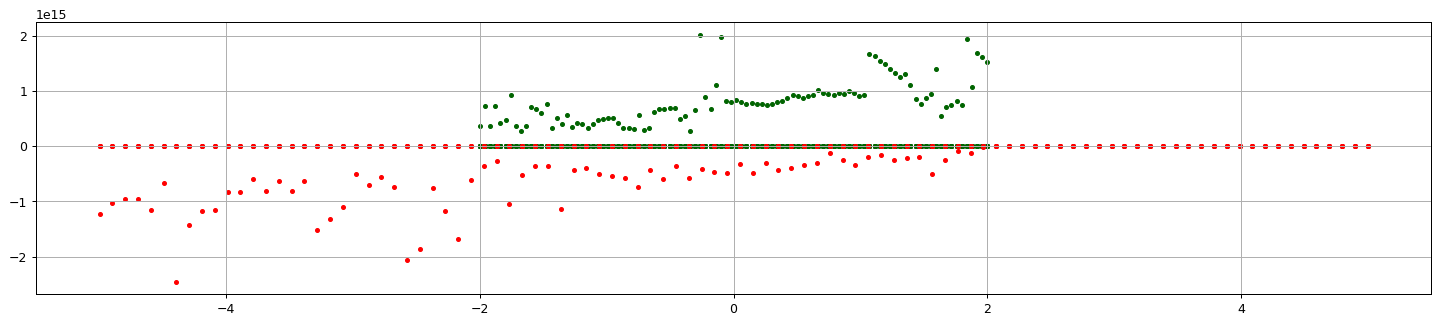

3.746262311935425


In [43]:
r,b = -4,2
x0 = np.linspace(-2,2,10)
tspan = [0, 100]

r = np.linspace(-2,2,100)
tic = time.time()
plt.figure(figsize=(20, 4), dpi=90)
plt.grid()
for j in range(r.size):
    sol = solve_ivp(dx2, tspan, x0,args=(r[j],b))
    t = sol.t
    x = sol.y
    for i in range(x0.size):
        plt.scatter(r[j],x[i,-1] , color='darkgreen', marker='.')


r,b = -4,2
x0 = np.linspace(-1,1,5)
tspan = [0, -100]

r = np.linspace(-5,5,100)
tic = time.time()
for j in range(r.size):
    sol = solve_ivp(dx2, tspan, x0,args=(r[j],b))

    t = sol.t
    x = sol.y
    for i in range(x0.size):
        plt.scatter(r[j],x[i,-1] , color='red', marker='.')
        


toc = time.time()
plt.show()
print(toc-tic)
